# ISHANT KUNDRA

# Part A 

## 1. Read and Analyse Dataset. [5 Marks]

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Desktop/data/blogtext.csv", nrows=1500)

### 1.A. Clearly write outcome of data analysis(Minimum 2 points) [2 Marks]

Outcomes of data analysis:
1. Details of blogger is given in total seven columns ( id', 'gender', 'age', 'topic', 'sign', 'date', 'text').
2. Data is comletely clean as not containg any missing (null) values.
3. Bloggers text is categorised into total 16 topics (Student',
 'InvestmentBanking',
 'indUnk',
 'Non-Profit',
 'Banking',
 'Education',
 'Engineering',
 'Science',
 'Communications-Media',
 'BusinessServices',
 'Sports-Recreation',
 'Arts',
 'Internet',
 'Museums-Libraries',
 'Accounting',
 'Technology).
 4.

In [3]:
data.shape

(1500, 7)

In [4]:
data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [5]:
data['text'].apply(lambda x: len(x.split(' '))).sum()

424873

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1500 non-null   int64 
 1   gender  1500 non-null   object
 2   age     1500 non-null   int64 
 3   topic   1500 non-null   object
 4   sign    1500 non-null   object
 5   date    1500 non-null   object
 6   text    1500 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.2+ KB


In [7]:
data.describe()

,id,age
count,1.500000e+03,1500.000000
mean,2.565302e+06,23.402000
std,1.211277e+06,7.486995
min,5.897360e+05,14.000000
25%,1.415200e+06,16.000000
50%,3.176655e+06,24.000000
75%,3.568056e+06,26.250000
max,4.313749e+06,45.000000


In [8]:
data.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [9]:
data.tail()

,id,gender,age,topic,sign,date,text
1495,589736,male,35,Technology,Aries,"05,August,2004",Um...testing...testing.... ....is ...
1496,589736,male,35,Technology,Aries,"05,August,2004",hmmm... okay. that was beautiful w...
1497,589736,male,35,Technology,Aries,"05,August,2004",group: make sure that when you ref...
1498,589736,male,35,Technology,Aries,"05,August,2004",watch that pendulum swing baby! ...
1499,589736,male,35,Technology,Aries,"05,August,2004",one final note (for now) on the mar...


In [10]:
data["topic"].nunique()

16

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='topic'>

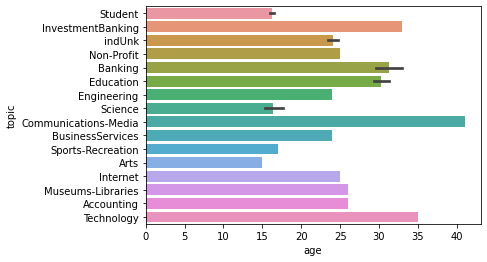

In [12]:
sns.barplot(x="age",y="topic", data=data)

<AxesSubplot:xlabel='gender', ylabel='age'>

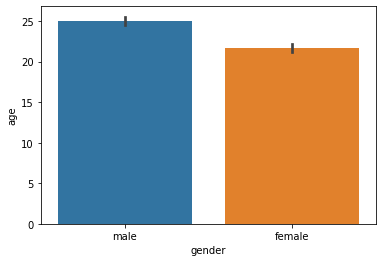

In [13]:
sns.barplot(x="gender",y="age", data=data)

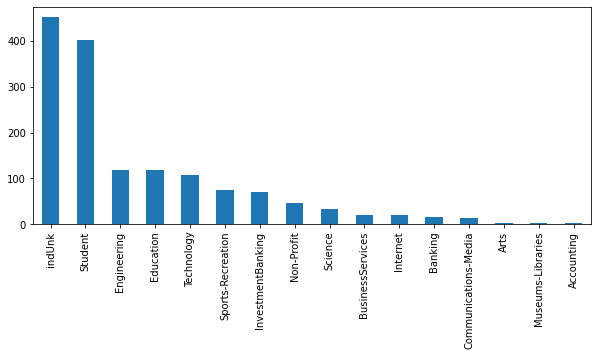

In [14]:
plt.figure(figsize=(10,4))
data.topic.value_counts().plot(kind='bar');

### 1.B. Clean the Structured Data [3 Marks]

#### 1.B.i. Missing value analysis and imputation. [1 Marks]

In [15]:
data.isnull().sum() ### No nan values in data

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

#### 1.B.ii. Eliminate Non-English textual data. [2 Marks]

In [16]:
! pip install langdetect


[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


In [17]:
from langdetect import detect

In [18]:
### Function to remove other than english text
import numpy as np
def removal_non_eng_text_data(row):
  ''' 
  Argument=values of text column 
  return nan if text is not in english language
  return same value if value is not contain text 
  e.g. if text is like -- ".","/","\"
  '''
  row=row
  try: 
    if detect(row)=="en":
      return row
    else:
      return np.nan
  except Exception as e:
    if e=="No features in text.":
      return row


In [19]:
## verification of function
a=data["text"].iloc[20]
a

"             Whenever I see a pregnant Korean lady I really feel for her, because I know that within a few months she will have a 3-5 year sentence to complete and utter child-rearing duties.  As with most things Korean, mothers go all out...right from before conception to...well, it never stops.    Today I got a taste of that.  What a day!  My 3-year old (Spencer) woke me up at 9AM (which is early seeing as I still have some jetlag and was up from midnight to 3AM last night).  The younger, Winston, was already up, too.  My wife and I must have fed these kids like 5-7 times during the day, they just never stop!  Spencer and I went to his swimming class.  We get a discount on regular swimming since he's enrolled.  The gal behind the counter asked if he was swimming outside of the class as well...I really had no idea what was happening and said, 'I'm not sure.'  She said, in no uncertain terms, that it meant a lot to her whether he was or not.  I just said, ok, he is, how much?  Let's s

In [20]:
removal_non_eng_text_data(a)

"             Whenever I see a pregnant Korean lady I really feel for her, because I know that within a few months she will have a 3-5 year sentence to complete and utter child-rearing duties.  As with most things Korean, mothers go all out...right from before conception to...well, it never stops.    Today I got a taste of that.  What a day!  My 3-year old (Spencer) woke me up at 9AM (which is early seeing as I still have some jetlag and was up from midnight to 3AM last night).  The younger, Winston, was already up, too.  My wife and I must have fed these kids like 5-7 times during the day, they just never stop!  Spencer and I went to his swimming class.  We get a discount on regular swimming since he's enrolled.  The gal behind the counter asked if he was swimming outside of the class as well...I really had no idea what was happening and said, 'I'm not sure.'  She said, in no uncertain terms, that it meant a lot to her whether he was or not.  I just said, ok, he is, how much?  Let's s

In [21]:
## Verification of function
a="да я вижу беременную кореянку, я действительно сочувствую ей, потому что знаю, что через несколько месяцев она умрет."
removal_non_eng_text_data(a)

nan

In [22]:
data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [23]:
data["text"]=data["text"].apply(removal_non_eng_text_data)

In [24]:
data["text"]

0                  Info has been found (+/- 100 pages,...
1                  These are the team members:   Drewe...
2                  In het kader van kernfusie op aarde...
3                        testing!!!  testing!!!          
4                    Thanks to Yahoo!'s Toolbar I can ...
                              ...                        
1495               Um...testing...testing....  ....is ...
1496               hmmm... okay.  that was beautiful w...
1497               group:  make sure that when you ref...
1498               watch that pendulum swing baby!    ...
1499               one final note (for now) on the mar...
Name: text, Length: 1500, dtype: object

## 2. Preprocess unstructured data to make it consumable for model training. [5 Marks]

In [25]:
## Handling non english text with nan values inserted nan values in text column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1500 non-null   int64 
 1   gender  1500 non-null   object
 2   age     1500 non-null   int64 
 3   topic   1500 non-null   object
 4   sign    1500 non-null   object
 5   date    1500 non-null   object
 6   text    1450 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.2+ KB


In [26]:
### Need to drop nan values before further procession
data_copy=data.copy()
data_copy.dropna(axis=0,inplace=True)

In [27]:
data_copy.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [28]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1450 non-null   int64 
 1   gender  1450 non-null   object
 2   age     1450 non-null   int64 
 3   topic   1450 non-null   object
 4   sign    1450 non-null   object
 5   date    1450 non-null   object
 6   text    1450 non-null   object
dtypes: int64(2), object(5)
memory usage: 90.6+ KB


### 2.A. Eliminate All special Characters and Numbers [2 Marks]

In [29]:
## A. Eliminate All special Characters and Numbers
import re
pattern = "[^\w ]" ### pattern to remove all characters except alphanumeric
data_copy["text"]= data_copy["text"].apply(lambda s : re.sub(pattern,"",s))

### 2.B. Lowercase all textual data [1 Marks]

In [30]:
data_copy["text"]=data_copy["text"].apply(lambda s: s.lower())

In [31]:
data_copy.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


### 2.C. Remove all Stopwords [1 Marks]

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishantkundra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords

In [34]:
## create set of stopwords
stopwords=set(stopwords.words('english'))

In [35]:
data_copy["text"]=data_copy["text"].apply(lambda s:" ".join([word for word in s.split() if word not in stopwords]))

In [36]:
data_copy.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


### 2.D. Remove all extra white spaces [1 Marks]

In [37]:
data_copy["text"]=data_copy["text"].apply(lambda s: s.strip())

In [38]:
data_copy.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [39]:
data_copy['text'].apply(lambda x: len(x.split(' '))).sum()

192468

## 3. Build a base Classification model [8 Marks]


### 3.A. Create dependent and independent variables [2 Marks] Hint: Treat ‘topic’ as a Target variable.

### 3.E. Clearly print Performance Metrics. [1 Marks]

In [40]:
## List of topics
list_label=list(data["topic"].unique())
list_label

['Student',
 'InvestmentBanking',
 'indUnk',
 'Non-Profit',
 'Banking',
 'Education',
 'Engineering',
 'Science',
 'Communications-Media',
 'BusinessServices',
 'Sports-Recreation',
 'Arts',
 'Internet',
 'Museums-Libraries',
 'Accounting',
 'Technology']

In [41]:
## Code to gnerate dictionary storing numerical values for each topic
label_dict={}  ## Empty Dictionary crearted to define numriacal values for unique topic
i=1
for key in list_label:
  label_dict[key]=i
  i+=1

In [42]:
label_dict

{'Student': 1,
 'InvestmentBanking': 2,
 'indUnk': 3,
 'Non-Profit': 4,
 'Banking': 5,
 'Education': 6,
 'Engineering': 7,
 'Science': 8,
 'Communications-Media': 9,
 'BusinessServices': 10,
 'Sports-Recreation': 11,
 'Arts': 12,
 'Internet': 13,
 'Museums-Libraries': 14,
 'Accounting': 15,
 'Technology': 16}

In [43]:
## Column is label_ID is created
data_copy["label_ID"]=data_copy["topic"]

In [44]:
## In label_ID column, assigned values to topics 
for i in label_dict.keys():
  data_copy["label_ID"] = data_copy["label_ID"].replace(i,label_dict[i])

In [45]:
data_copy.tail(10)

,id,gender,age,topic,sign,date,text,label_ID
1490,589736,male,35,Technology,Aries,"05,August,2004",argument absolutes seems subjective universe o...,16
1491,589736,male,35,Technology,Aries,"05,August,2004",well folks wont get commentary next days im go...,16
1492,589736,male,35,Technology,Aries,"05,August,2004",thanks mir first could see links forgot scoll ...,16
1493,589736,male,35,Technology,Aries,"05,August,2004",love smile enter secret city ben already told ...,16
1494,589736,male,35,Technology,Aries,"05,August,2004",sercet city indeed secret find enter sercet ci...,16
1495,589736,male,35,Technology,Aries,"05,August,2004",umtestingtesting thing hello world ben post,16
1496,589736,male,35,Technology,Aries,"05,August,2004",hmmm okay beautiful referring comments city ni...,16
1497,589736,male,35,Technology,Aries,"05,August,2004",group make sure refer respond information sour...,16
1498,589736,male,35,Technology,Aries,"05,August,2004",watch pendulum swing baby favorite quotes new ...,16
1499,589736,male,35,Technology,Aries,"05,August,2004",one final note marriage solution issue yes thi...,16


In [46]:
data_copy["topic"].nunique()

16

In [47]:
data_copy["label_ID"].nunique()

16

In [48]:
data_copy["topic"].unique()

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology'], dtype=object)

### 3.B. Split data into train and test. [1 Marks]

In [49]:
## Independent variable
x=data_copy["text"]
x.head()

0    info found 100 pages 45 mb pdf files wait unti...
1    team members drewes van der laag urllink mail ...
2    het kader van kernfusie op aarde maak je eigen...
3                                      testing testing
4    thanks yahoos toolbar capture urls popupswhich...
Name: text, dtype: object

In [50]:
x.isnull().sum()

0

In [51]:
type(x)

pandas.core.series.Series

In [52]:
## Dependent variable
y=data_copy["label_ID"]
y.head()

0    1
1    1
2    1
3    1
4    2
Name: label_ID, dtype: int64

In [53]:
## Converted label_ID column into array
y=np.array(data_copy["label_ID"])
y

array([ 1,  1,  1, ..., 16, 16, 16])

### 3.C. Vectorize data using any one vectorizer. [2 Marks]

In [54]:
## wordembedding through countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
cv=CountVectorizer(ngram_range=(1, 2))

In [56]:
x_vect=cv.fit_transform(x)  ### After applying word embedding

In [57]:
x_vect.shape

(1450, 183427)

In [58]:
x_vect

<1450x183427 sparse matrix of type '<class 'numpy.int64'>'
	with 331107 stored elements in Compressed Sparse Row format>

In [59]:
x=x_vect.toarray()  ## converted into array

### 3.B. Split data into train and test. [1 Marks]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size = 0.2)

In [61]:
X_train.shape

(1160, 183427)

In [62]:
y_train.shape

(1160,)

In [63]:
X_test.shape

(290, 183427)

In [64]:
y_test.shape

(290,)

### 3.D. Build a base model for Supervised Learning - Classification. [2 Marks]

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [66]:
from sklearn import linear_model
lm_cv = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm_cv.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [67]:
lm_1_cv = linear_model.LogisticRegression(multi_class='ovr', solver='lbfgs')
lm_1_cv.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [68]:
from sklearn.svm import LinearSVC
l_svc_cv = LinearSVC(C=1.0, penalty='l1', dual=False, loss='squared_hinge')
l_svc_cv.fit(X_train,y_train)

/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, penalty='l1')

In [69]:
from sklearn.neighbors import KNeighborsClassifier

mdl = KNeighborsClassifier(n_neighbors=3)
mdl.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
y_pred_lm_cv=lm_cv.predict(X_test)
print("Accuracy Score - logistic Regression (Count vectoriser and solver='liblinear':", accuracy_score(y_test,y_pred_lm_cv))
y_pred_lm1_cv=lm_1_cv.predict(X_test)
print("Accuracy Score - logistic Regression (Count vectoriser and solver='lbfgs':",accuracy_score(y_test,y_pred_lm1_cv))
y_pred_svc_cv=l_svc_cv.predict(X_test)
print("Accuracy Score - SVM ( Count vectoriser):",accuracy_score(y_test,y_pred_svc_cv))
y_pred_knn_cv=mdl.predict(X_test)
print("Accuracy Score - knn ( Count vectoriser):",accuracy_score(y_test,y_pred_knn_cv))

Accuracy Score - logistic Regression (Count vectoriser and solver='liblinear': 0.5758620689655173
Accuracy Score - logistic Regression (Count vectoriser and solver='lbfgs': 0.5758620689655173
Accuracy Score - SVM ( Count vectoriser): 0.5689655172413793
Accuracy Score - knn ( Count vectoriser): 0.27241379310344827


In [71]:
print("Confusion matrix- logistic Regression (Count vectoriser and solver='liblinear':", confusion_matrix(y_test,y_pred_lm_cv))
print("Confusion matrix- logistic Regression (Count vectoriser and solver='lbfgs':", confusion_matrix(y_test,y_pred_lm1_cv))
print("Confusion matrix- SVM ( Count vectoriser):", confusion_matrix(y_test,y_pred_svc_cv))
print("Confusion matrix- knn ( Count vectoriser):", confusion_matrix(y_test,y_pred_knn_cv))

Confusion matrix- logistic Regression (Count vectoriser and solver='liblinear': [[43  0 16  0  0  0  2  0  0  0  0  0  0  3]
 [ 1 10  5  0  0  0  0  0  0  0  0  0  0  0]
 [17  0 73  0  0  2  0  0  0  0  0  0  0  2]
 [ 2  0  2  2  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  3  0  0  1  0  0  0  0  0  0  0  0]
 [ 6  0 13  0  0  6  0  0  0  0  0  0  0  1]
 [ 1  0  7  0  0  0 11  0  0  0  0  0  0  1]
 [ 1  0  3  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  1  0  0  2  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  1  0  0  0  1  0  0  0  0]
 [ 1  0  2  0  0  0  0  0  0  0  9  0  0  0]
 [ 1  0  2  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0 11  0  0  0  0  0  0  0  0  0  0 11]]
Confusion matrix- logistic Regression (Count vectoriser and solver='lbfgs': [[42  0 15  1  0  0  3  0  0  0  0  0  0  3]
 [ 1 11  4  0  0  0  0  0  0  0  0  0  0  0]
 [17  0 73  0  0  2  0  0  0  0  0  0  0  2]
 [ 2  0  2  2  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  3  0  0  1  0  0  0  0  

In [72]:
print("classification_report- logistic Regression (Count vectoriser and solver='liblinear':", classification_report(y_test,y_pred_lm_cv))
print("classification_report- logistic Regression (Count vectoriser and solver='lbfgs':", classification_report(y_test,y_pred_lm1_cv))
print("classification_report- SVM ( Count vectoriser):", classification_report(y_test,y_pred_svc_cv))
print("classification_report- knn ( Count vectoriser):", classification_report(y_test,y_pred_knn_cv))

classification_report- logistic Regression (Count vectoriser and solver='liblinear':               precision    recall  f1-score   support

           1       0.52      0.67      0.59        64
           2       1.00      0.62      0.77        16
           3       0.53      0.78      0.63        94
           4       1.00      0.29      0.44         7
           5       0.00      0.00      0.00         5
           6       0.46      0.23      0.31        26
           7       0.85      0.55      0.67        20
           8       1.00      0.20      0.33         5
           9       0.00      0.00      0.00         5
          10       1.00      0.33      0.50         3
          11       0.90      0.75      0.82        12
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       0.58      0.39      0.47        28

    accuracy                           0.58       290
   macro avg       0.56      0.34      0.39      

/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## 4. Improve Performance of model. [14 Marks]

### 4.A. Experiment with other vectorisers. [4 Marks]

### 4.B. Build classifier Models using other algorithms than base model. [4 Marks]

### 4.C. Tune Parameters/Hyperparameters of the model/s. [4 Marks]

### 4.D. Clearly print Performance Metrics. [2 Marks]

In [73]:
data_copy["label_ID"]=data_copy["topic"]
list_label=list(data["topic"].unique())
label_dict={}
i=1
for key in list_label:
  label_dict[key]=i
  i+=1
for i in label_dict.keys():
  data_copy["label_ID"] = data_copy["label_ID"].replace(i,label_dict[i])
data_copy.tail(10)

,id,gender,age,topic,sign,date,text,label_ID
1490,589736,male,35,Technology,Aries,"05,August,2004",argument absolutes seems subjective universe o...,16
1491,589736,male,35,Technology,Aries,"05,August,2004",well folks wont get commentary next days im go...,16
1492,589736,male,35,Technology,Aries,"05,August,2004",thanks mir first could see links forgot scoll ...,16
1493,589736,male,35,Technology,Aries,"05,August,2004",love smile enter secret city ben already told ...,16
1494,589736,male,35,Technology,Aries,"05,August,2004",sercet city indeed secret find enter sercet ci...,16
1495,589736,male,35,Technology,Aries,"05,August,2004",umtestingtesting thing hello world ben post,16
1496,589736,male,35,Technology,Aries,"05,August,2004",hmmm okay beautiful referring comments city ni...,16
1497,589736,male,35,Technology,Aries,"05,August,2004",group make sure refer respond information sour...,16
1498,589736,male,35,Technology,Aries,"05,August,2004",watch pendulum swing baby favorite quotes new ...,16
1499,589736,male,35,Technology,Aries,"05,August,2004",one final note marriage solution issue yes thi...,16


In [74]:
x=data_copy["text"]
y=data_copy["label_ID"]

In [75]:
### TF-TDF
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer(ngram_range=(1, 2))
X=tv.fit_transform(x)
X.shape

(1450, 183427)

In [76]:
X

<1450x183427 sparse matrix of type '<class 'numpy.float64'>'
	with 331107 stored elements in Compressed Sparse Row format>

In [77]:
x=X.toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [78]:
sum(x[10])

15.82218134014004

In [79]:
y=np.array(data_copy["label_ID"])

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=20, test_size = 0.2)


In [81]:
from sklearn import linear_model
lm_tfidf = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm_tfidf.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [82]:
lm_1_tfidf = linear_model.LogisticRegression(multi_class='ovr', solver='lbfgs')
lm_1_tfidf.fit(X_train,y_train)


LogisticRegression(multi_class='ovr')

In [83]:
from sklearn.svm import LinearSVC
l_svc_tfidf = LinearSVC(C=1.0, penalty='l1', dual=False, loss='squared_hinge')
l_svc_tfidf.fit(X_train,y_train)

LinearSVC(dual=False, penalty='l1')

In [84]:
from sklearn.neighbors import KNeighborsClassifier

mdl_tfidf = KNeighborsClassifier(n_neighbors=3)
mdl_tfidf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

mdl_tfidf1 = KNeighborsClassifier(n_neighbors=5)
mdl_tfidf1.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
er=[]

for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_i_pred=knn.predict(X_test)
    er.append(np.mean(y_i_pred!=y_test))

Text(0, 0.5, 'error rate')

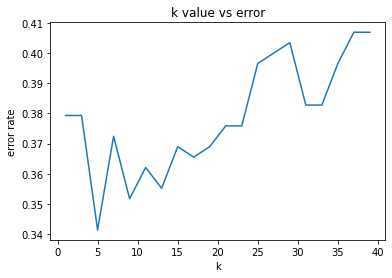

In [87]:
plt.plot(range(1,40,2),er)
plt.title('k value vs error')
plt.xlabel('k')
plt.ylabel('error rate')

In [88]:
y_pred_lm_tfidf=lm_tfidf.predict(X_test)
print("Accuracy Score - logistic Regression (TFIDF vectoriser and solver='liblinear':", accuracy_score(y_test,y_pred_lm_tfidf))
y_pred_lm1_tfidf=lm_1_tfidf.predict(X_test)
print("Accuracy Score - logistic Regression (TFIDF vectoriser and solver='lbfgs':",accuracy_score(y_test,y_pred_lm1_tfidf))
y_pred_svc_tfidf=l_svc_tfidf.predict(X_test)
print("Accuracy Score - SVM ( TFIDF vectoriser):",accuracy_score(y_test,y_pred_svc_tfidf))
y_pred_knn_tfidf=mdl_tfidf.predict(X_test)
print("Accuracy Score - knn ( TFIDF vectoriser and NN=3):",accuracy_score(y_test,y_pred_knn_tfidf))
y_pred_knn_tfidf1=mdl_tfidf1.predict(X_test)
print("Accuracy Score - knn ( TFIDF vectoriser and NN=5):",accuracy_score(y_test,y_pred_knn_tfidf1))

Accuracy Score - logistic Regression (TFIDF vectoriser and solver='liblinear': 0.3931034482758621
Accuracy Score - logistic Regression (TFIDF vectoriser and solver='lbfgs': 0.3931034482758621
Accuracy Score - SVM ( TFIDF vectoriser): 0.5793103448275863
Accuracy Score - knn ( TFIDF vectoriser and NN=3): 0.6206896551724138
Accuracy Score - knn ( TFIDF vectoriser and NN=5): 0.6586206896551724


In [89]:
print("Confusion matrix- logistic Regression (TFIDF vectoriser and solver='liblinear':\n", confusion_matrix(y_test,y_pred_lm_tfidf))
print("Confusion matrix- logistic Regression (TFIDF vectoriser and solver='lbfgs':\n", confusion_matrix(y_test,y_pred_lm1_tfidf))
print("Confusion matrix- SVM ( TFIDF vectoriser):\n", confusion_matrix(y_test,y_pred_svc_tfidf))
print("Confusion matrix- knn ( TFIDF vectoriser):\n", confusion_matrix(y_test,y_pred_knn_tfidf))

Confusion matrix- logistic Regression (TFIDF vectoriser and solver='liblinear':
 [[39  0 40  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0 75  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 5  0 21  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 19  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 25  0  0  0  0  0  0  0  0  0  0  0]]
Confusion matrix- logistic Regression (TFIDF vectoriser and solver='lbfgs':
 [[39  0 40  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0 75  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 15  0  0  0  0  0  0  0

In [90]:
print("classification_report- logistic Regression (TFIDF vectoriser and solver='liblinear':\n", classification_report(y_test,y_pred_lm_tfidf))
print("classification_report- logistic Regression (TFIDF vectoriser and solver='lbfgs':\n", classification_report(y_test,y_pred_lm1_tfidf))
print("classification_report- SVM ( TFIDF vectoriser):\n", classification_report(y_test,y_pred_svc_tfidf))
print("classification_report- knn ( TFIDF vectoriser):\n", classification_report(y_test,y_pred_knn_tfidf))

classification_report- logistic Regression (TFIDF vectoriser and solver='liblinear':
               precision    recall  f1-score   support

           1       0.70      0.49      0.58        79
           2       0.00      0.00      0.00        14
           3       0.32      0.93      0.48        81
           4       0.00      0.00      0.00         8
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        26

    accuracy                           0.39       290
   macro avg       0.07      0.10      0.08     

/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ishantkundra/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [91]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [92]:
model.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [93]:
y_pred_LRmultinomial=model.predict(X_test)
accuracy_score(y_test,y_pred_LRmultinomial)

0.39655172413793105

## 5. Share insights on relative performance comparison [8 Marks]

### 5.A. Which vectorizer performed better? Probable reason?.[2 Marks]

* I have tried two vectoriser - 1. count vectoriser , 2. TFIDF vectoriser
With three machine learning algorithm - Logistic regression, SVM, KNN
Build model with both type of vectoriser.
I found count vectoriser with logistic regression is giving better accuracy among others.
And TFIDF vectoriser with KNN is giving better accuracy among others.

### 5.B. Which model outperformed? Probable reason? [2 Marks]

* logistic regression with count vectoriser and knn with tfidf are performing better.
*  Since Logistic regression with multi-class classification problem is based onone-vs-rest(ovr) or multinomial.


### 5.C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?. [2 Marks]

* TFIDF vectors are having tfidf score values for each word. knn works on distance matrix. And Similarity can be checked by comapring tfidf values vectors.KNN with tfidf vectors is performing better among other ML algo.Number of nighbours can be tuned for improving accuracy.

### 5.D. According to you, which performance metric should be given most importance, why?. [2 Marks]

* Performance metrics - Accuracy score which gives number of  correct prediction out of total prediction is more important. 

# PART - B

## 1. Start chat session with greetings and ask what the user is looking for. [5 Marks]

## 2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus. [10 Marks]

## 3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it. [5 Marks]

In [97]:
import nltk
import json
import numpy as np
import random

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()


words = []
labels = []
docs_x = []
docs_y = []

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishantkundra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishantkundra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
import wikipedia as wk

In [99]:
data_file=open('Desktop/data/GL+Bot.json').read()
data=json.loads(data_file)

In [100]:
for intent in data['intents']:
    for pattern in intent['patterns']:
        wrds = nltk.word_tokenize(pattern)
        words.extend(wrds)
        docs_x.append(wrds)
        docs_y.append(intent["tag"])
        
    if intent['tag'] not in labels:
        labels.append(intent['tag'])

In [101]:
words = [stemmer.stem(w.lower()) for w in words if w != "?"]
words = sorted(list(set(words)))

labels = sorted(labels)

In [102]:
training = []
output = []

out_empty = [0 for _ in range(len(labels))]

for x, doc in enumerate(docs_x):
    bag = []

    wrds = [stemmer.stem(w.lower()) for w in doc]

    for w in words:
        if w in wrds:
            bag.append(1)
        else:
            bag.append(0)

    output_row = out_empty[:]
    output_row[labels.index(docs_y[x])] = 1

    training.append(bag)
    output.append(output_row)

In [103]:
training = np.array(training)
output = np.array(output)

In [104]:
import tflearn
import tensorflow as tf
import random
tf.compat.v1.reset_default_graph()

net = tflearn.input_data(shape=[None, len(training[0])])
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, 8)
net = tflearn.fully_connected(net, len(output[0]), activation="softmax")
net = tflearn.regression(net)

model = tflearn.DNN(net)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


2023-04-22 16:20:54.831313: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [105]:
model.fit(training, output, n_epoch=100, batch_size=8, show_metric=True)
model.save("model.tflearn")

Training Step: 1599  | total loss: 0.42750 | time: 0.125s
| Adam | epoch: 100 | loss: 0.42750 - acc: 0.9441 -- iter: 120/128
Training Step: 1600  | total loss: 0.43298 | time: 0.130s
| Adam | epoch: 100 | loss: 0.43298 - acc: 0.9247 -- iter: 128/128
--
INFO:tensorflow:/Users/ishantkundra/model.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [106]:
def bag_of_words(s, words):
    bag = [0 for _ in range(len(words))]

    s_words = nltk.word_tokenize(s)
    s_words = [stemmer.stem(word.lower()) for word in s_words]

    for se in s_words:
        for i, w in enumerate(words):
            if w == se:
                bag[i] = 1
            
    return np.array(bag)


def chat():
    print("Start talking with the bot (type quit to stop)!")
    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
            break

        results = model.predict([bag_of_words(inp, words)])
        results_index = np.argmax(results)
        tag = labels[results_index]

        for tg in data["intents"]:
            if tg['tag'] == tag:
              # print(tag)
              if tag in ["NN","SL","Olympus"]:
                try:
                  responses = wk.summary(inp, sentences = 3)
                except Exception as e:
                  print("Try again with relevant quetion")
                  responses=""
              else:
                responses = tg['responses']
              
        print(responses)    
        # print(random.choice(responses))

chat()

Start talking with the bot (type quit to stop)!
You: hello
['Hello! how can i help you ?']
You: what is deep learning?
Deep learning is part of a broader family of machine learning methods, which is based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.Artificial neural networks (ANNs) were inspired by information processing and distributed communication nodes in biological systems. ANNs have various 